## Data Loading

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
from tensorflow.keras import datasets, layers,models

In [9]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_11664\1504753299.py:1: SyntaxWarning: invalid escape sequence '\c'
  file_path="D:\cifar-10-python\cifar-10-batches-py"


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 32s 0us/step


In [18]:
print(f"shape of X_train is : {X_train.shape}")
print(f"shape of X_test is : {X_test.shape}")

shape of X_train is : (50000, 32, 32, 3)
shape of X_test is : (10000, 32, 32, 3)


In [19]:
print(f"shape of y_train is : {y_train.shape}")
print(f"shape of y_test is : {y_test.shape}")

shape of y_train is : (50000, 1)
shape of y_test is : (10000, 1)


In [20]:
y_train[:5] #its a 2D array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [21]:
#convert this in array
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [22]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

### plot some sample image

In [24]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

7


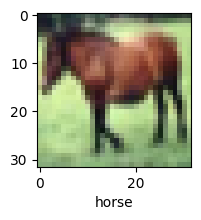

In [28]:
index=np.random.randint(0,9)
print(index)
plot_sample(X_train,y_train,index)

### Normalize the training data

In [29]:
X_train=X_train/255.0
X_test=X_test/255.0

### Simple Artificial Neural Network for Image Classification

In [30]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 98ms/step - accuracy: 0.2748 - loss: 2.2399
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.3923 - loss: 1.6816
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4250 - loss: 1.5962
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 155s 99ms/step - accuracy: 0.4503 - loss: 1.5387
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 156s 100ms/step - accuracy: 0.4618 - loss: 1.4905


In [32]:
from sklearn.metrics import confusion_matrix , classification_report
y_pred=ann.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [35]:
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification Report: \n" ,classification_report(y_test,y_pred_classes))

classification Report: 
               precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.59      0.59      0.59      1000
           2       0.43      0.24      0.31      1000
           3       0.34      0.30      0.32      1000
           4       0.39      0.49      0.43      1000
           5       0.42      0.34      0.38      1000
           6       0.47      0.56      0.52      1000
           7       0.49      0.57      0.53      1000
           8       0.66      0.52      0.58      1000
           9       0.49      0.56      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.48      0.48      0.47     10000
weighted avg       0.48      0.48      0.47     10000



## Simple Conv Neural Network

In [38]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
    

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [40]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3960 - loss: 1.6743
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5846 - loss: 1.1776
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6410 - loss: 1.0177
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6686 - loss: 0.9445
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7005 - loss: 0.8616
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7225 - loss: 0.7952
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7356 - loss: 0.7567
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7548 - loss: 0.7052
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7694 - loss: 0.6620
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7800 - loss: 0.6282


In [43]:
y_pred_Conv=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [44]:
y_pred_classes_Conv=[np.argmax(element) for element in y_pred_Conv]
print("classification Report: \n" ,classification_report(y_test,y_pred_classes_Conv))

classification Report: 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72      1000
           1       0.88      0.75      0.81      1000
           2       0.52      0.64      0.58      1000
           3       0.48      0.53      0.50      1000
           4       0.65      0.60      0.63      1000
           5       0.64      0.54      0.59      1000
           6       0.77      0.76      0.77      1000
           7       0.72      0.77      0.74      1000
           8       0.84      0.77      0.80      1000
           9       0.81      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [47]:
y_pred_classes_Conv[:10]

[3, 8, 8, 0, 6, 6, 1, 2, 3, 1]

In [50]:
y_test[:10].reshape(-1,) # we can clearly see the false predicted classes

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

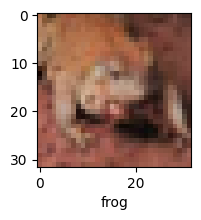

In [52]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
    plt.figure(figsize=(15, 2))
    plt.imshow(X[index])
    
    # If y[index] is an array, extract the scalar value
    label = y[index] if isinstance(y[index], int) else y[index][0]  # Adjust this if your structure differs
    plt.xlabel(classes[label])
    plt.show()

# Example call
plot_sample(X_test, y_test, 5)
